# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**My written answers for Q1 are also in the pdf I attached**

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

1.

In [3]:
from google.colab import files

uploaded = files.upload()

Saving ForeignGifts_edu.csv to ForeignGifts_edu.csv


2.

In [4]:
foreign_gifts = pd.read_csv('ForeignGifts_edu.csv')
foreign_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [5]:
foreign_gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


<Axes: >

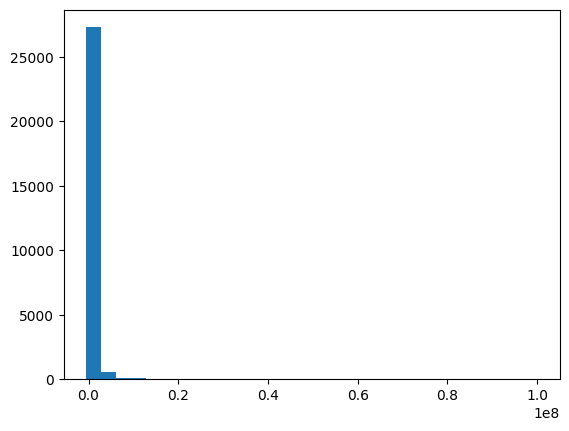

In [6]:
foreign_gifts['Foreign Gift Amount'].hist(bins=30,grid=False)
#this is just the straight normal histogram and doesn't tell me much

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

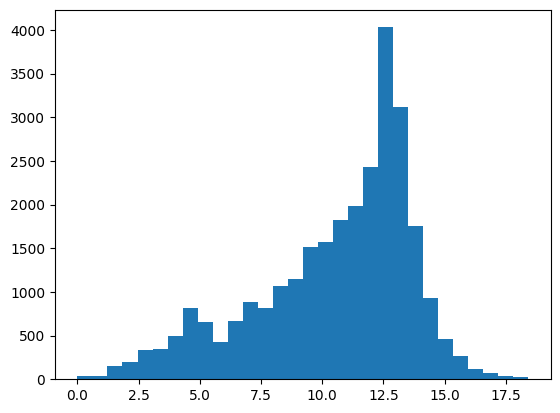

In [7]:
foreign_gifts['Foreign Gift Amount Log'] = np.log(foreign_gifts['Foreign Gift Amount'])
foreign_gifts['Foreign Gift Amount Log'].hist(bins=30,grid=False)
#this is the log histogram

In [8]:
foreign_gifts['Foreign Gift Amount'].describe()

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


The foreign gift amount variable does not appear very helpfully in the normal histogram set up. The data needs significant smoothing, so I used the log function to attempt to provide a more helpful histogram.Once logged the data appears much more helpfully spread out in the histogram

3. For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [9]:
foreign_gifts['Gift Type'].value_counts()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [10]:
foreign_gifts['Gift Type'].count()

28221

In [11]:
foreign_gifts['Gift Type'].value_counts()/foreign_gifts['Gift Type'].count()

,count
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


61.2% are contract gifts, 38.75% are monetary gifts and 0.0039% are real estate gifts.

4. Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

<Axes: ylabel='Density'>

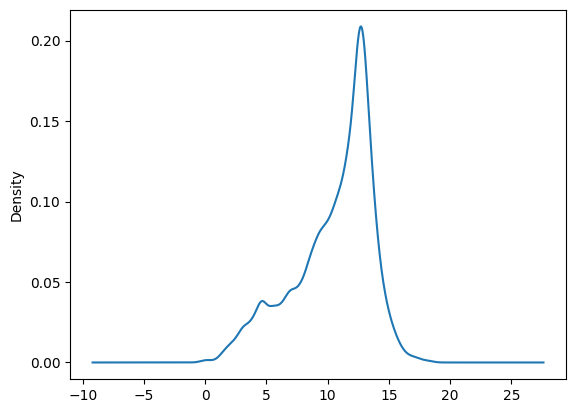

In [12]:
foreign_gifts['Foreign Gift Amount Log'].plot.kde()

,Foreign Gift Amount Log
Gift Type,
Contract,"Axes(0.125,0.11;0.775x0.77)"
Monetary Gift,"Axes(0.125,0.11;0.775x0.77)"
Real Estate,"Axes(0.125,0.11;0.775x0.77)"


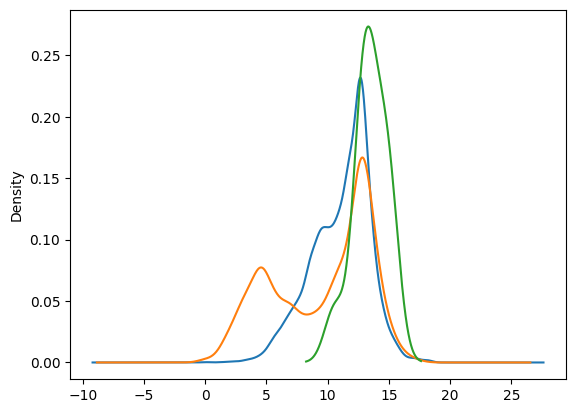

In [13]:
foreign_gifts.groupby('Gift Type')['Foreign Gift Amount Log'].plot.kde()

The two kernel density plots appear to follow similar patterns, however when they are directly compared you can see how there is one group of gifts (most likely the real estate) which doesn't really fall into line with the general kernal density plot.

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?


In [14]:
foreign_gifts.groupby('Country of Giftor')['Country of Giftor'].count().sort_values(ascending=False).head(15)

,Country of Giftor
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [15]:
foreign_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

In [16]:
foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: ylabel='Frequency'>

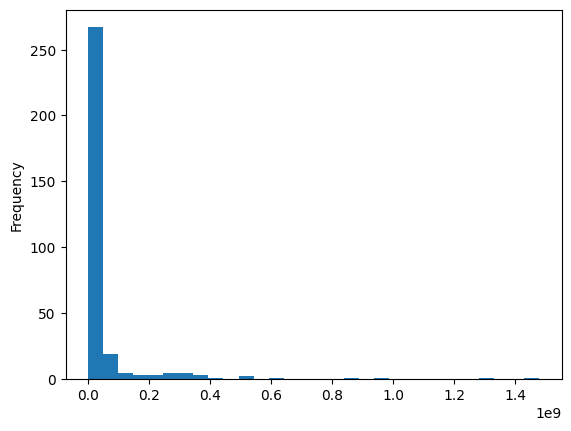

In [17]:
foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).plot.hist(bins=30,grid=False)

7. Which giftors provide the most money, in total?

In [18]:
foreign_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [19]:
from google.colab import files

uploaded = files.upload()

Saving drilling_rigs.csv to drilling_rigs.csv


In [20]:
drilling_rigs = pd.read_csv('drilling_rigs.csv')
drilling_rigs.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [23]:
drilling_rigs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

There are 623 observations and 10 recorded variables. Not all of the numeric variables were correctly read, for example the Active Well Service Rig Count was not read as an integer but it should be. Other Categories have a number of Not Available entries recorded which are not recorded as null so that will have to be cleaned up.

2. To convert the Month variable to an ordered datetime variable, use df['time'] = pd.to_datetime(df['Month'], format='mixed').

In [24]:
drilling_rigs['time'] = pd.to_datetime(drilling_rigs['Month'], format='mixed')

3. Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

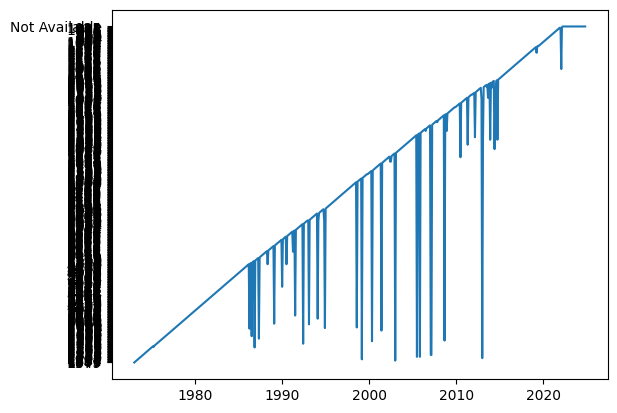

In [27]:
plt.plot(drilling_rigs['time'],drilling_rigs['Active Well Service Rig Count (Number of Rigs)'])

The line graph appears to be increasing over time, however it is difficult to say how much of that increase is genuine becuase hte Active Well Service Rig Count is very skewed and still includes a number of data points that are simply recorded as not available. The drops in the line graph highlights the questionability of this data in the form that it is currently in.

In [30]:
drilling_rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drilling_rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

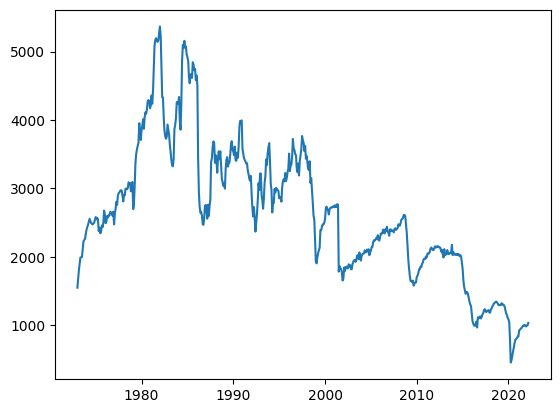

In [31]:
plt.plot(drilling_rigs['time'],drilling_rigs['Active Well Service Rig Count (Number of Rigs)'])

When the not available records are removed from the Active Well Service Rig Count data column, the line graph actually shows that the amount of active rigs has decreased over time. This makes sense when considering how modernization has increased a push for more renewable energy and less drilling.

4. Instead of levels, we want to look at change over time. Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time. Describe what you see.

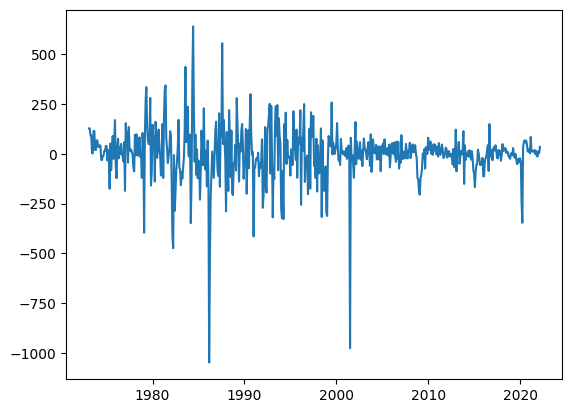

In [35]:
plt.plot(drilling_rigs['time'], drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].diff())

The difference in the Active Rig Count over time seems to vary greatly each year, however there is a pattern of around the mid 1980s where the difference seems to vary widly, but closer to 2010 and the difference seems to be fluctuating still but remaining closer to 0.

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [37]:
drilling_rigs_melt = pd.melt(drilling_rigs, id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'])

<Axes: xlabel='time'>

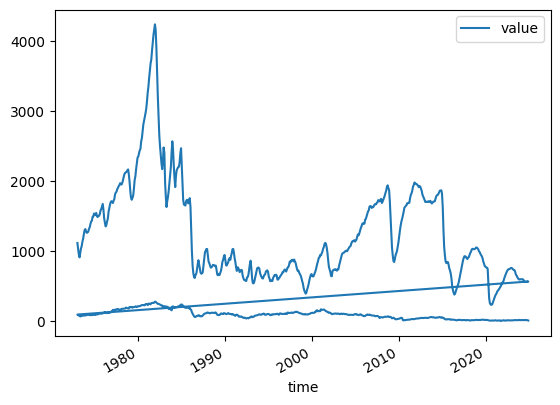

In [39]:
drilling_rigs_melt.plot(x='time', y='value')